# Bank ANN
 A model to predict whether the customer will leave the bank or not

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('Customer_Churn_Modelling.csv')

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = dataset.drop(labels=['CustomerId','Surname','RowNumber','Exited'], axis=1)
y = dataset['Exited']

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label1 = LabelEncoder()
x['Geography']= label1.fit_transform(x['Geography'])

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
label =LabelEncoder()
x['Gender'] = label.fit_transform(x['Gender'])
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [12]:
x = pd.get_dummies(x, drop_first=True, columns=['Geography'])
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


## Feature Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0, stratify=y)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [16]:
x_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

In [17]:
y_train

493     1
6839    0
170     0
4958    0
4271    0
       ..
6727    1
4674    0
6399    1
872     0
8389    0
Name: Exited, Length: 8000, dtype: int64

## Building the ANN 

In [18]:
model = Sequential()
model.add(Dense(x.shape[1], activation='relu', input_dim=x.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Evaluation

In [22]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [23]:
y_test

1344    1
8167    0
4747    0
5004    1
3124    1
       ..
9107    0
8249    0
8337    0
6279    1
412     0
Name: Exited, Length: 2000, dtype: int64

In [24]:
model.evaluate(x_test, y_test.to_numpy())

63/63 [==============================] - 0s 1ms/step - loss: 0.3555 - accuracy: 0.8575


[0.35546955466270447, 0.8575000166893005]

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [27]:
confusion_matrix(y_test, y_pred)

array([[1560,   33],
       [ 252,  155]])

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn
ar = confusion_matrix(y_test, y_pred)

br = ['exited', 'not exited']

Text(46.5, 0.5, 'true')

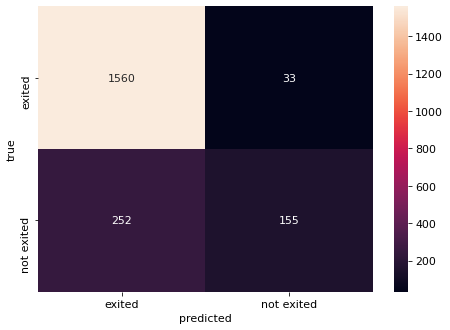

In [37]:
df_cm = pd.DataFrame(ar, index = [i for i in br],
                  columns = [i for i in br])

plt.figure(figsize = (7.5,5.25))
plt.rcParams.update({'font.size': 11})
sn.heatmap(df_cm, annot=True, fmt='g')
plt.xlabel("predicted")
plt.ylabel("true")

In [28]:
accuracy_score(y_test, y_pred)

0.8575

## Saving the model

In [38]:
model.save('bank_customer_review.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: bank_customer_review.model/assets
